In [1]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["font.size"] = 20

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

from astropy import units as u
from astropy.coordinates import SkyCoord

/Users/dfm/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
!wget https://raw.githubusercontent.com/OpenExoplanetCatalogue/oec_tables/master/comma_separated/open_exoplanet_catalogue.txt

--2015-10-28 11:12:38--  https://raw.githubusercontent.com/OpenExoplanetCatalogue/oec_tables/master/comma_separated/open_exoplanet_catalogue.txt
Resolving raw.githubusercontent.com... 199.27.79.133
Connecting to raw.githubusercontent.com|199.27.79.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239672 (234K) [text/plain]
Saving to: 'open_exoplanet_catalogue.txt'

100%[======================================>] 239,672     1.34MB/s   in 0.2s   

2015-10-28 11:12:41 (1.34 MB/s) - 'open_exoplanet_catalogue.txt' saved [239672/239672]



In [5]:
names = ["id", "binary", "mass", "radius", "period", "a", "e", "per", "long", "asc", "incl",
         "teq", "age", "method", "year", "updated", "ra", "dec", "dist", "s_mass", "s_radius",
         "s_feh", "s_teff", "s_age"]

In [6]:
oec = pd.read_csv("open_exoplanet_catalogue.txt", skiprows=30, names=names)

In [7]:
for k, _ in oec.groupby("method"):
    print(k, np.sum(oec.method == k))

RV 644
imaging 48
microlensing 37
timing 24
transit 1307


In [8]:
bins = np.arange(oec.year.min()-0.5, oec.year.max()+1.5)
hist = dict((k, np.zeros(len(bins))) for k, _ in oec.groupby("method"))
for (year, method), count in oec.groupby(("year", "method")).id.count().iteritems():
    i = int(np.digitize([year], bins)) - 1
    hist[method][i] = count

/Users/dfm/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


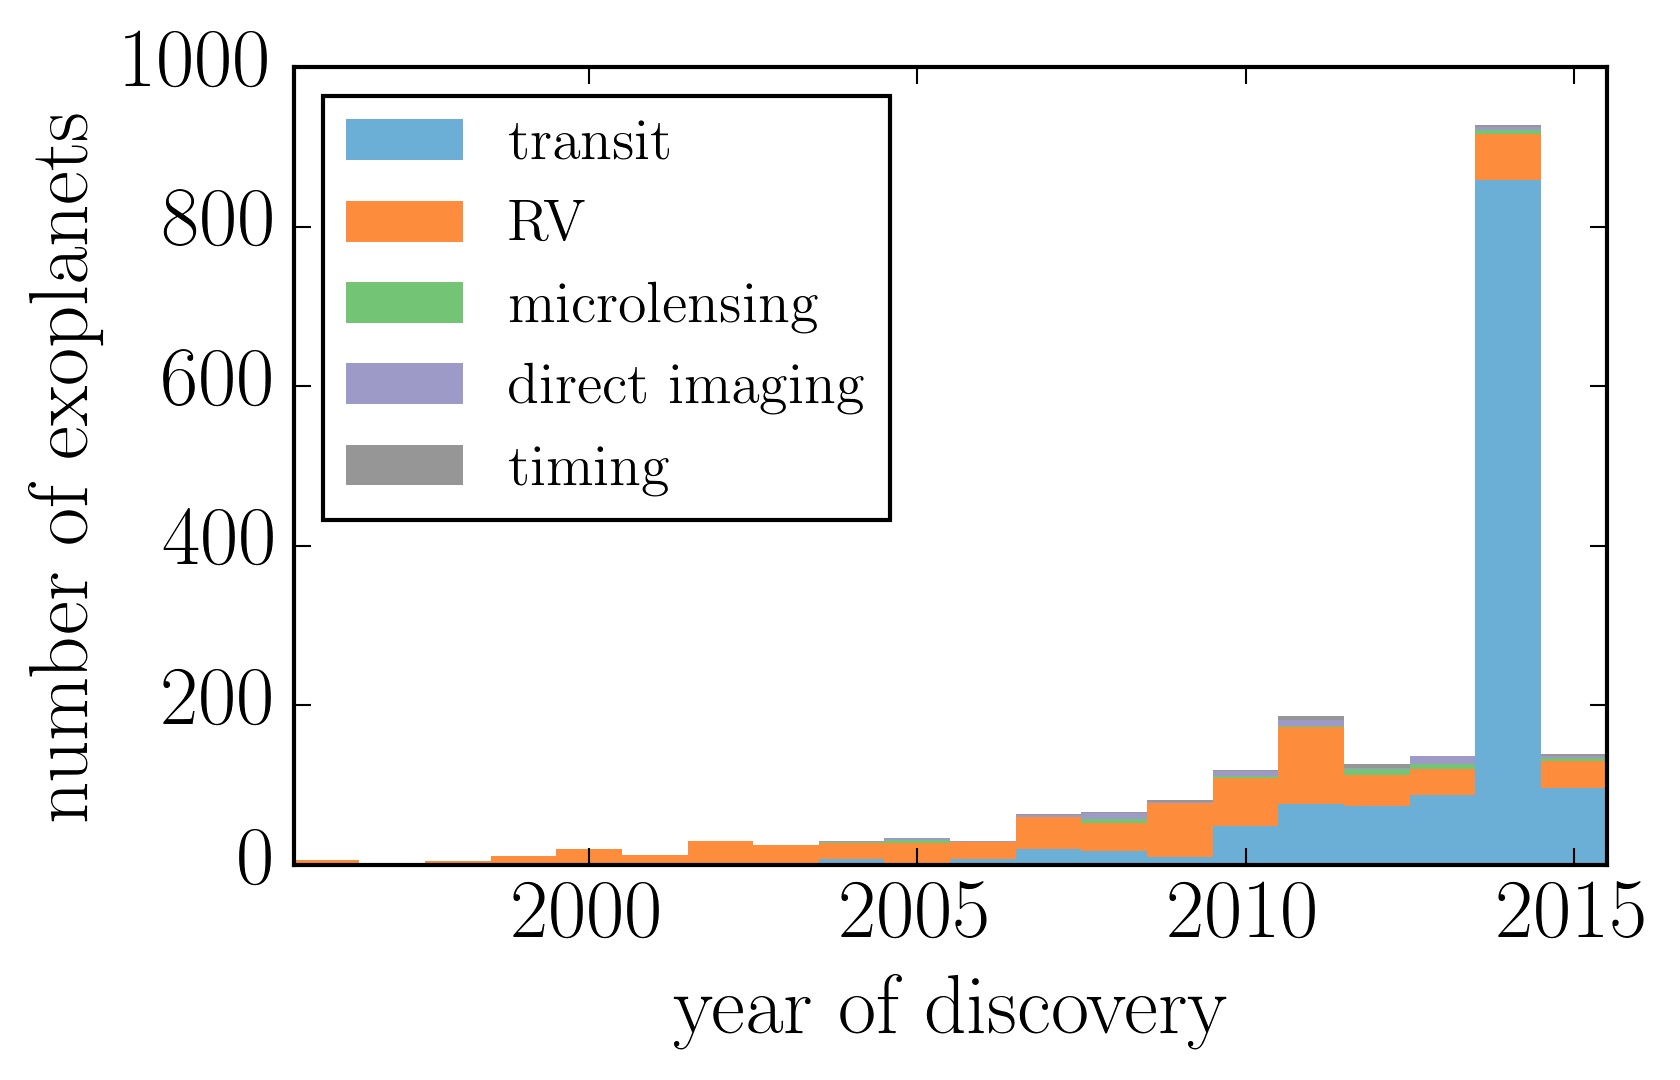

In [9]:
pl.bar(bins, hist["transit"], width=1.0, color="#6baed6", edgecolor="none",
       label="transit")
pl.bar(bins, hist["RV"], width=1.0, color="#fd8d3c", edgecolor="none",
       bottom=hist["transit"],
       label="RV")
pl.bar(bins, hist["microlensing"], width=1.0, color="#74c476", edgecolor="none",
       bottom=hist["transit"] + hist["RV"],
       label="microlensing")
pl.bar(bins, hist["imaging"], width=1.0, color="#9e9ac8", edgecolor="none",
       bottom=hist["transit"] + hist["RV"] + hist["microlensing"],
       label="direct imaging")
pl.bar(bins, hist["timing"], width=1.0, color="#969696", edgecolor="none",
       bottom=hist["transit"] + hist["RV"] + hist["microlensing"] + hist["imaging"],
       label="timing")
pl.xlim(1995.5, 2015.5)
pl.legend(fontsize=14, loc="upper left")
pl.xlabel("year of discovery")
pl.ylabel("number of exoplanets")
pl.gcf().set_tight_layout(True)
pl.savefig("discoveries.pdf")

In [10]:
!wget 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=*' -O kois.csv 

--2015-10-28 11:36:50--  http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=*
Resolving exoplanetarchive.ipac.caltech.edu... 134.4.54.147
Connecting to exoplanetarchive.ipac.caltech.edu|134.4.54.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'kois.csv'

    [                       <=>             ] 10,249,856  1.88MB/s   in 6.1s   

2015-10-28 11:37:05 (1.61 MB/s) - 'kois.csv' saved [10249856]



In [11]:
kois = pd.read_csv("kois.csv")

/Users/dfm/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


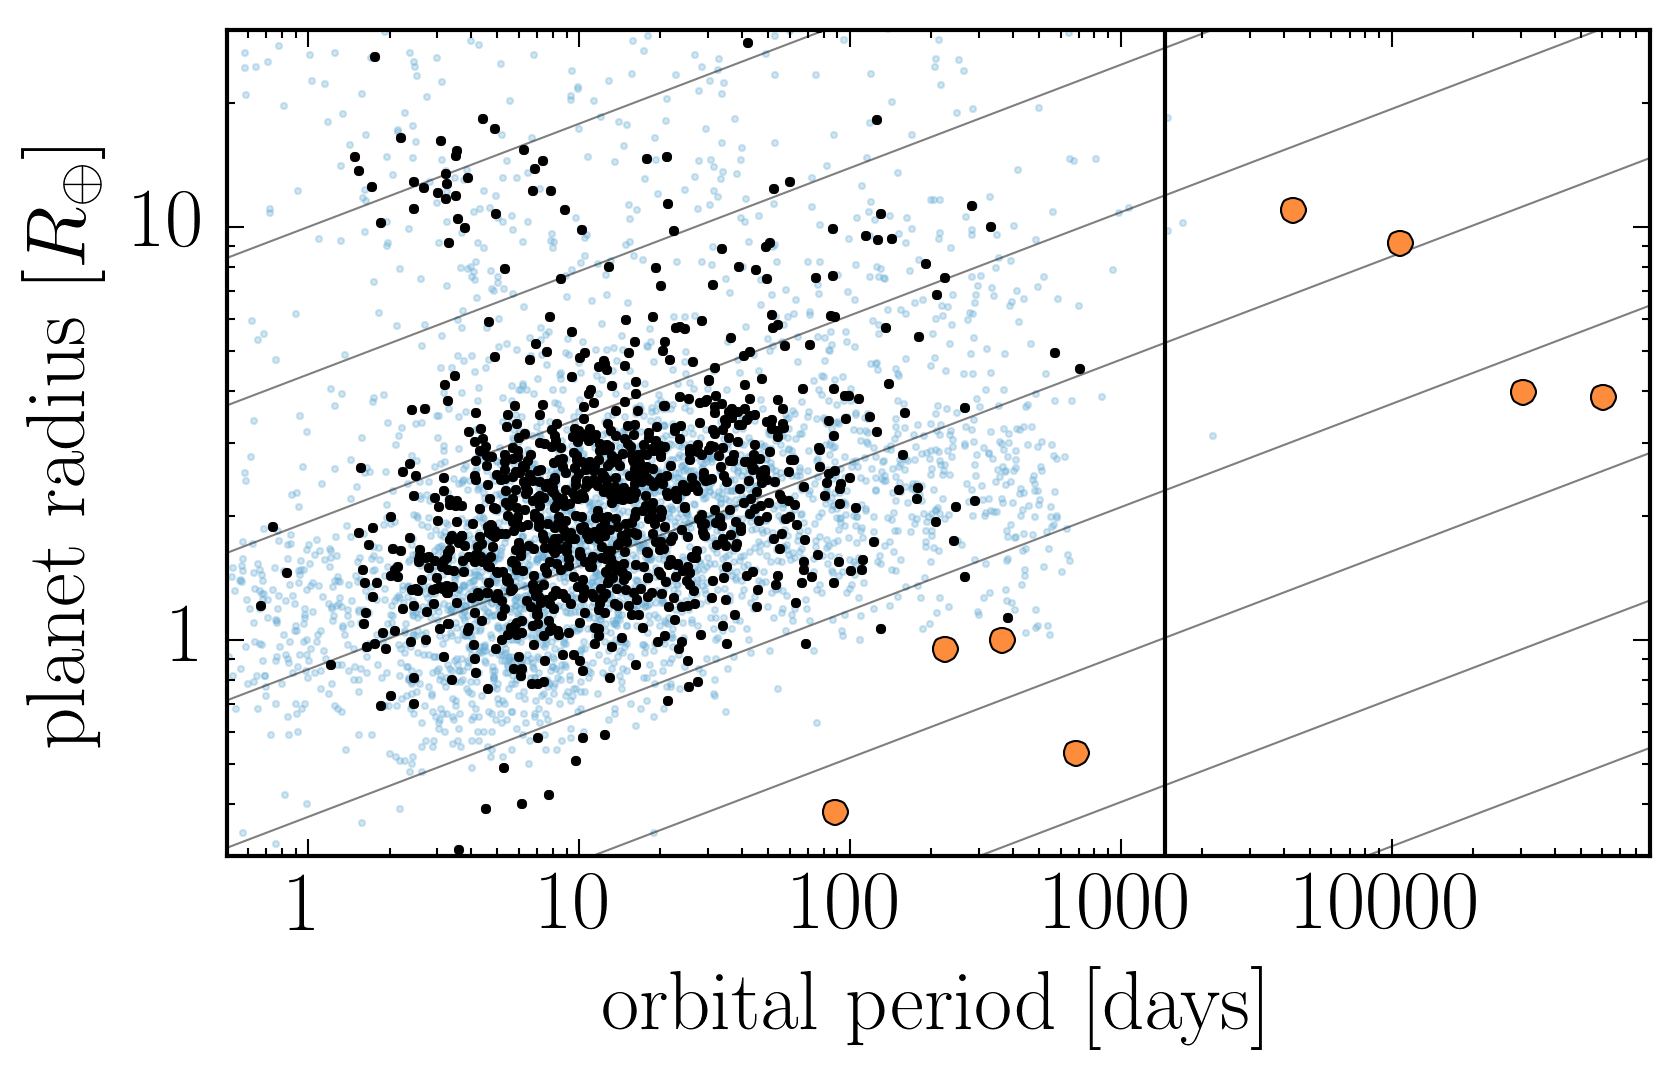

In [31]:
import matplotlib

m = kois.koi_disposition == "CONFIRMED"
x, y = kois[m].koi_period, kois[m].koi_prad

x0 = np.exp(np.linspace(np.log(0.1), np.log(9e4), 500))
for f in np.exp(np.linspace(np.log(0.001), np.log(100), 8)):
    y0 = np.sqrt(f * np.sqrt(x0))
    # y0[x0 > 365 * 4. / 3.] = np.sqrt(f * 4.5 / 3.)
    pl.plot(x0, y0, "k", lw=0.5, alpha=0.5)

pl.loglog(x, y, ".k", ms=4)
pl.xlim(1.1, 450.)
pl.ylim(0.3, 30)
pl.xlabel("orbital period [days]")
pl.ylabel("planet radius [$R_\oplus$]")
pl.gcf().set_tight_layout(True)

fmt = matplotlib.ticker.FormatStrFormatter("%.0f")
pl.gca().xaxis.set_major_formatter(fmt)
pl.gca().yaxis.set_major_formatter(fmt)
pl.savefig("kepler_planets.pdf")

# Plot KOIs.
m = kois.koi_disposition == "CANDIDATE"
x, y = kois[m].koi_period, kois[m].koi_prad
pl.plot(x, y, ".", color="#6baed6", ms=3, alpha=0.3, zorder=-1)
pl.savefig("kepler_kois.pdf")

# Plot the solar system.
rad = np.array("2439.7	6051.8	6371.00	3389.5	69911	58232	25362	24622".split(), dtype=float)
period = np.array("0.2408467	0.61519726	1.0000174	1.8808476	11.862615	29.447498	84.016846	164.79132".split(), dtype=float)
pl.plot(period * 365, rad / rad[2], "o", color="#fd8d3c")
pl.savefig("kepler_planets_and_solar_system.pdf")
pl.xlim(0.5, max(x0))
pl.gca().axvline(4*365, color="k")
pl.savefig("kepler_planets_and_solar_system_zoom.pdf")


In [14]:
k2tab = """
$201208431.01$ & $10.00411 \pm {0.00163}$ & $7.5198 \pm {0.0085}$ & $2.33 \pm {0.26}$ & $27.68 \pm {0.94}$ & $0.0780 \pm {0.0016}$ & $562 \pm {14} $ & Planet\\
$201257461.01$ & $50.26759 \pm {0.00743}$ & $20.3803 \pm {0.0185}$ & $13.55 \pm {8.55}$ & $79.73 \pm {4.60}$ & $0.2323 \pm {0.0066}$ & $381 \pm {13} $ & FP\\
$201295312.01$ & $5.65621 \pm {0.00075}$ & $3.7229 \pm {0.0114}$ & $1.95 \pm {0.26}$ & $13.43 \pm {1.16}$ & $0.0629 \pm {0.0015}$ & $1150 \pm {55} $ & Candidate \\
$201338508.01$ & $10.93271 \pm {0.00200}$ & $6.5961 \pm {0.0079}$ & $2.14 \pm {0.37}$ & $30.90 \pm {1.66}$ & $0.0804 \pm {0.0024}$ & $526 \pm {21} $ & Planet \\
$201338508.02$ & $5.73501 \pm {0.00058}$ & $0.8636 \pm {0.0061}$ & $2.03 \pm {0.24}$ & $20.10 \pm {1.08}$ & $0.0523 \pm {0.0016}$ & $652 \pm {26} $ & Planet\\
$201367065.01$ & $10.05429 \pm {0.00032}$ & $5.4184 \pm {0.0019}$ & $2.12 \pm {0.22}$ & $30.24 \pm {1.59}$ & $0.0749 \pm {0.0020}$ & $507 \pm {17} $ & Planet\\
$201367065.02$ & $24.64682 \pm {0.00149}$ & $4.2766 \pm {0.0031}$ & $1.59 \pm {0.15}$ & $54.98 \pm {2.89}$ & $0.1361 \pm {0.0036}$ & $376 \pm {13} $ & Planet\\
$201384232.01$ & $30.93716 \pm {0.00428}$ & $19.5044 \pm {0.0056}$ & $2.68 \pm {0.31}$ & $44.08 \pm {3.92}$ & $0.1911 \pm {0.0048}$ & $616 \pm {31} $ & Planet\\
$201393098.01$ & $28.68077 \pm {0.01250}$ & $16.6201 \pm {0.0225}$ & $2.34 \pm {0.48}$ & $43.14 \pm {3.07}$ & $0.1808 \pm {0.0041}$ & $614 \pm {25} $ & Planet\\
$201403446.01$ & $19.15379 \pm {0.00565}$ & $7.3425 \pm {0.0135}$ & $1.91 \pm {0.35}$ & $28.06 \pm {3.72}$ & $0.1447 \pm {0.0052}$ & $852 \pm {56} $ & Candidate\\
$201445392.01$ & $10.35262 \pm {0.00116}$ & $5.6113 \pm {0.0048}$ & $2.74 \pm {0.51}$ & $26.35 \pm {1.35}$ & $0.0837 \pm {0.0023}$ & $663 \pm {20} $ & Candidate\\
$201445392.02$ & $5.06442 \pm {0.00066}$ & $5.0675 \pm {0.0067}$ & $2.17 \pm {0.39}$ & $16.36 \pm {0.84}$ & $0.0520 \pm {0.0014}$ & $841 \pm {26} $ & Candidate\\
$201465501.01$ & $18.44878 \pm {0.00143}$ & $14.6719 \pm {0.0032}$ & $1.74 \pm {0.63}$ & $71.01 \pm {14.29}$ & $0.0885 \pm {0.0104}$ & $293 \pm {30} $ & Candidate\\
$201505350.01$ & $11.90699 \pm {0.00035}$ & $9.2850 \pm {0.0080}$ & $4.51 \pm {0.66}$ & $26.15 \pm {3.14}$ & $0.0961 \pm {0.0026}$ & $752 \pm {45} $ & Planet\\
$201505350.02$ & $7.91933 \pm {0.00007}$ & $5.3837 \pm {0.0009}$ & $6.37 \pm {0.85}$ & $19.93 \pm {2.40}$ & $0.0733 \pm {0.0020}$ & $861 \pm {52} $ & Planet\\
$201546283.01$ & $6.77133 \pm {0.00011}$ & $4.8450 \pm {0.0015}$ & $4.11 \pm {0.38}$ & $18.38 \pm {1.12}$ & $0.0658 \pm {0.0018}$ & $873 \pm {28} $ & Candidate\\
$201549860.01$ & $5.60822 \pm {0.00057}$ & $4.1193 \pm {0.0049}$ & $2.13 \pm {0.44}$ & $17.83 \pm {0.61}$ & $0.0548 \pm {0.0012}$ & $750 \pm {17} $ & Candidate\\
$201555883.01$ & $5.79658 \pm {0.00023}$ & $5.3179 \pm {0.0027}$ & $3.75 \pm {0.56}$ & $20.10 \pm {1.06}$ & $0.0530 \pm {0.0015}$ & $694 \pm {24} $ & FP\\
$201565013.01$ & $8.63811 \pm {0.00023}$ & $3.4285 \pm {0.0016}$ & $12.15 \pm {3.91}$ & $28.87 \pm {2.84}$ & $0.0660 \pm {0.0033}$ & $523 \pm {40} $ & Candidate\\
$201569483.01$ & $5.79690 \pm {0.00001}$ & $5.3127 \pm {0.0001}$ & $34.10 \pm {5.09}$ & $16.89 \pm {0.85}$ & $0.0588 \pm {0.0015}$ & $880 \pm {25} $ &FP\\
$201577035.01$ & $19.30622 \pm {0.00136}$ & $11.5785 \pm {0.0031}$ & $3.58 \pm {0.61}$ & $35.11 \pm {5.34}$ & $0.1365 \pm {0.0035}$ & $668 \pm {49} $ & Planet\\
$201596316.01$ & $39.84348 \pm {0.01392}$ & $21.8566 \pm {0.0096}$ & $2.23 \pm {0.38}$ & $61.36 \pm {4.19}$ & $0.2126 \pm {0.0072}$ & $475 \pm {19} $ & Candidate\\
$201613023.01$ & $8.28186 \pm {0.00060}$ & $7.3738 \pm {0.0061}$ & $2.03 \pm {0.24}$ & $18.99 \pm {1.60}$ & $0.0786 \pm {0.0020}$ & $925 \pm {38} $ & Planet\\
$201617985.01$ & $7.28210 \pm {0.00076}$ & $4.6341 \pm {0.0046}$ & $1.78 \pm {0.58}$ & $27.38 \pm {2.14}$ & $0.0573 \pm {0.0022}$ & $497 \pm {24} $ & Candidate\\
$201629650.01$ & $40.04833 \pm {0.02111}$ & $4.5343 \pm {0.0172}$ & $2.12 \pm {0.52}$ & $59.20 \pm {4.08}$ & $0.2153 \pm {0.0059}$ & $513 \pm {19} $ & Planet\\
$201635569.01$ & $8.36807 \pm {0.00019}$ & $3.4511 \pm {0.0017}$ & $5.13 \pm {0.77}$ & $29.29 \pm {2.48}$ & $0.0636 \pm {0.0025}$ & $502 \pm {27} $ & Candidate\\
$201649426.01$ & $27.77044 \pm {0.00006}$ & $13.3479 \pm {0.0002}$ & $30.03 \pm {5.78}$ & $56.87 \pm {4.97}$ & $0.1523 \pm {0.0063}$ & $440 \pm {22} $ &FP\\
$201702477.01$ & $40.73649 \pm {0.00245}$ & $3.5451 \pm {0.0026}$ & $7.66 \pm {0.81}$ & $55.99 \pm {3.67}$ & $0.2239 \pm {0.0051}$ & $526 \pm {19} $ & Planet\\
$201736247.01$ & $11.81037 \pm {0.00170}$ & $3.8492 \pm {0.0081}$ & $2.82 \pm {0.32}$ & $27.44 \pm {1.42}$ & $0.0936 \pm {0.0023}$ & $690 \pm {21} $ & Planet\\
$201754305.01$ & $19.07246 \pm {0.00519}$ & $1.4889 \pm {0.0148}$ & $2.21 \pm {0.84}$ & $41.60 \pm {2.07}$ & $0.1219 \pm {0.0035}$ & $517 \pm {16} $ & Planet\\
$201754305.02$ & $7.62016 \pm {0.00103}$ & $3.6811 \pm {0.0057}$ & $2.18 \pm {1.04}$ & $22.57 \pm {1.12}$ & $0.0661 \pm {0.0019}$ & $702 \pm {22} $ & Planet\\
$201779067.01$ & $27.24292 \pm {0.00013}$ & $12.2594 \pm {0.0004}$ & $38.51 \pm {8.27}$ & $33.03 \pm {5.39}$ & $0.1784 \pm {0.0053}$ & $746 \pm {58} $ &FP\\
$201828749.01$ & $33.50924 \pm {0.00228}$ & $5.1556 \pm {0.0042}$ & $2.47 \pm {0.81}$ & $57.87 \pm {18.68}$ & $0.1903 \pm {0.0066}$ & $519 \pm {62} $ & Candidate\\
$201855371.01$ & $17.97149 \pm {0.00164}$ & $9.9414 \pm {0.0035}$ & $2.19 \pm {0.23}$ & $40.14 \pm {1.60}$ & $0.1169 \pm {0.0028}$ & $478 \pm {13} $ & Planet\\
$201912552.01$\tablenotemark{1} & $32.94139 \pm {0.00292}$ & $28.1877 \pm {0.0036}$ & $2.24 \pm {0.25}$ & $84.27 \pm {9.54}$ & $0.1491 \pm {0.0053}$ & $271 \pm {16} $ & Planet\\
$201929294.01$ & $5.00842 \pm {0.00006}$ & $4.5719 \pm {0.0014}$ & $8.62 \pm {0.72}$ & $16.33 \pm {0.92}$ & $0.0513 \pm {0.0016}$ & $838 \pm {29}$ & FP
""".split("\n")[1:-1]

tab = [[c.strip().strip("$") for c in row.strip("\\").split("&")] for row in k2tab]
tab = [row for row in tab if row[-1] in ["Planet", "Candidate"]]

periods = [float(row[1].split("\\")[0]) for row in tab]
rad = [float(row[3].split("\\pm")[0]) for row in tab]
rerr = [float(row[3].split("\\pm")[1].strip().strip("{}")) for row in tab]

/Users/dfm/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


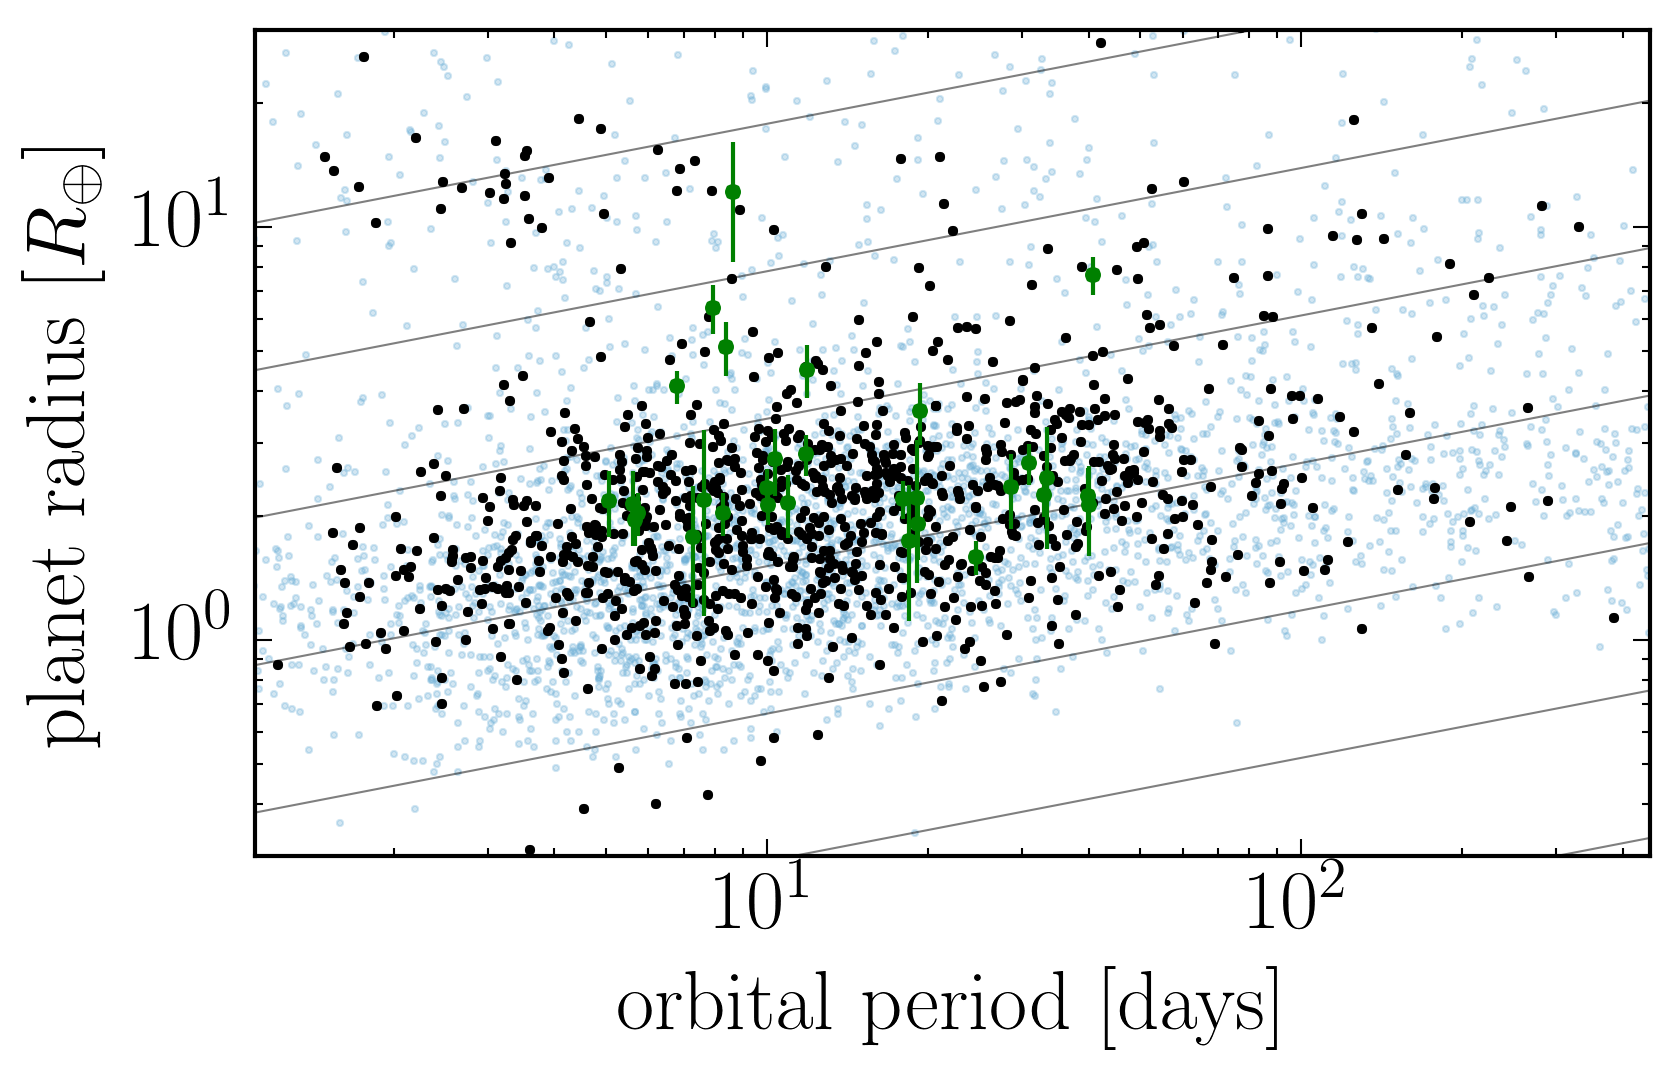

In [15]:
m = kois.koi_disposition == "CONFIRMED"
x, y = kois[m].koi_period, kois[m].koi_prad

x0 = np.exp(np.linspace(np.log(0.1), np.log(2e5), 500))
for f in np.exp(np.linspace(np.log(0.001), np.log(100), 8)):
    y0 = np.sqrt(f * np.sqrt(x0))
    # y0[x0 > 365 * 4. / 3.] = np.sqrt(f * 4.5 / 3.)
    pl.plot(x0, y0, "k", lw=0.5, alpha=0.5)

pl.loglog(x, y, ".k", ms=4)
pl.xlim(1.1, 450.)
pl.ylim(0.3, 30)
pl.xlabel("orbital period [days]")
pl.ylabel("planet radius [$R_\oplus$]")
pl.gcf().set_tight_layout(True)

# Plot KOIs.
m = kois.koi_disposition == "CANDIDATE"
x, y = kois[m].koi_period, kois[m].koi_prad
pl.plot(x, y, ".", color="#6baed6", ms=3, alpha=0.3, zorder=-1)

pl.errorbar(periods, rad, yerr=rerr, capsize=0, ms=4, mec="none", fmt="og", zorder=5000)
pl.savefig("k2-cands.pdf")